# Heart disease detection using 5 class classifier
(Shreejaa Talla)

### Index

1. [Introduction](#introduction)
2. [Instructions](#inst)
3. [Import required libraries](#import)
4. [Data Preprocessing](#preprocessing)
    1. [Loading Data](#load)
    2. [Data Visualisation](#visual)
    3. [Cleaning Data](#clean)
    4. [Class Distribution](#class)
    5. [Update clean data to excel](#update)
    6. [Categorical Data Encoding](#encode)
    7. [Statistics of cleve_data](#statistics)
5. [Classification Model](#classification)
    1. [Selection of Feature vector](#feature)
    2. [Target Labels](#target)
    3. [Spliting train and test data](#split)
    4. [Dataset class for model](#dataset)
    5. [Classification Model](#model)
    6. [Train Model](#train)
    7. [Train Accuracy and Loss Vizualization](#tviz)
    8. [Test Model](#test)
6. [Evaluate the classification model](#evaluate)
    1. [Accuracy and Classification error](#acc)
    2. [Presicion, Recall, f1-score for each class](#report)
    3. [Confusion Matrix](#cm)
    4. [ROC curve and AUC values for each class](#roc5)
    5. [ROC Curve for 10 fold cross-validation](#roc)

<a id="introduction"></a>
### Multi Class Classification

Cleve.mod data is used for classification

#### Original Data:


63.0 male angina 145.0 233.0 true  hyp 150.0 fal  2.3 down 0.0  fix buff  H
67.0 male asympt 160.0 286.0 fal   hyp 108.0 true 1.5 flat 3.0 norm sick S2
67.0 male asympt 120.0 229.0 fal   hyp 129.0 true 2.6 flat 2.0  rev sick S1
37.0 male notang 130.0 250.0 fal  norm 187.0 fal  3.5 down 0.0 norm buff  H
41.0  fem abnang 130.0 204.0 fal   hyp 172.0 fal  1.4   up 0.0 norm buff  H
56.0 male abnang 120.0 236.0 fal  norm 178.0 fal  0.8   up 0.0 norm buff  H
62.0  fem asympt 140.0 268.0 fal   hyp 160.0 fal  3.6 down 2.0 norm sick S3
57.0  fem asympt 120.0 354.0 fal  norm 163.0 true 0.6   up 0.0 norm buff  H
63.0 male asympt 130.0 254.0 fal   hyp 147.0 fal  1.4 flat 1.0  rev sick S2
53.0 male asympt 140.0 203.0 true  hyp 155.0 true 3.1 down 0.0  rev sick S1
57.0 male asympt56.0 male notang 130.0 256.0 true  hyp 142.0 true 0.6 flat 1.0  fix sick S2
44.0 male abnang 120.0 263.0 fal  norm 173.0 fal  0.0   up 0.0  rev buff  H
49.0 male abnang 130.0 140.0 192.0 fal  norm 148.0 fal  0.4 flat 0.0  fix buff  H
56.0  fem abnang 140.0 294.0 fal   hyp 153.0 fal  1.3 flat 0.0 norm buff  H
 266.0 fal  norm 171.0 fal  0.6   up 0.0 norm buff  H
64.0 male angina 110.0 211.0 fal   hyp 144.0 true 1.8 flat 0.0 norm buff  H
58.0  fem angina 150.0 283.0 true  hyp 162.0 fal  1.0   up 0.0 norm buff  H
58.0 male abnang 120.0 284.0 fal   hyp 160.0 fal  1.8 flat 0.0 norm sick S1
58.0 male notang 132.0 224.0 fal   hyp 173.0 fal  3.2   up 2.0  rev sick S3

#### Understanding the data attributes:

Attributes: 8 symbolic, 6 numeric

1. Age: (29-77) age group
2. Sex: Male or female
3. CP: chest pain type (angina, abnang, notang, asympt)
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    1. norm: normal
    2. abn: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    3. hyper: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. class att: 0 is healthy, 1,2,3,4 is sick
13. thal: norm = normal; fixed = fixed defect; rever = reversable defect



<a id="import"></a>
### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import seaborn as sns
import matplotlib.pyplot as plt

import torch as T
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler


from tqdm.notebook import tqdm
from scipy import interp
from itertools import cycle


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

<a id="inst"></a>
### INSTRUCTIONS

1. Run CODE_SOFTWARE.ipynb in jupter notebook cell by cell.
2. Both USER_MANUAL_AND_RESULTS pdf and html are a copy of CODE_SOFTWARE.ipynb
3. USER_MANUAL_AND_RESULTS.html can be used to better understand the outputs.

<a id="preprocessing"></a>
## Step1: Data Preprocessing

1. Data is Transferred to excel workbook and is converted into columns and rows based on spaces and next lines.
2. Column values are set up based on attributes given.
3. Columns fbs and exang are boolean values, hence they are coverted to 1 as True and 0 as False in excel

<a id="load"></a>
### Loading Data

In [2]:
cleve = pd.read_excel("cleve_not_processed.xlsx")
cleve

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,class_attribute,thal,class_value,class_name
0,63,male,angina,145,233,1,hyp,150,0,2.3,down,0,fix,buff,H
1,67,male,asympt,160,286,0,hyp,108,1,1.5,flat,3,norm,sick,S2
2,67,male,asympt,120,229,0,hyp,129,1,2.6,flat,2,rev,sick,S1
3,37,male,notang,130,250,0,norm,187,0,3.5,down,0,norm,buff,H
4,41,female,abnang,130,204,0,hyp,172,0,1.4,up,0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48,male,notang,124,255,1,norm,175,0,0.0,up,2,norm,buff,H
299,57,male,asympt,132,207,0,norm,168,1,0.0,up,0,rev,buff,H
300,49,male,notang,118,149,0,hyp,126,0,0.8,up,3,norm,sick,S1
301,74,female,abnang,120,269,0,hyp,121,1,0.2,up,1,norm,buff,H


<a id="visual"></a>
### Visualizing the data according to class name

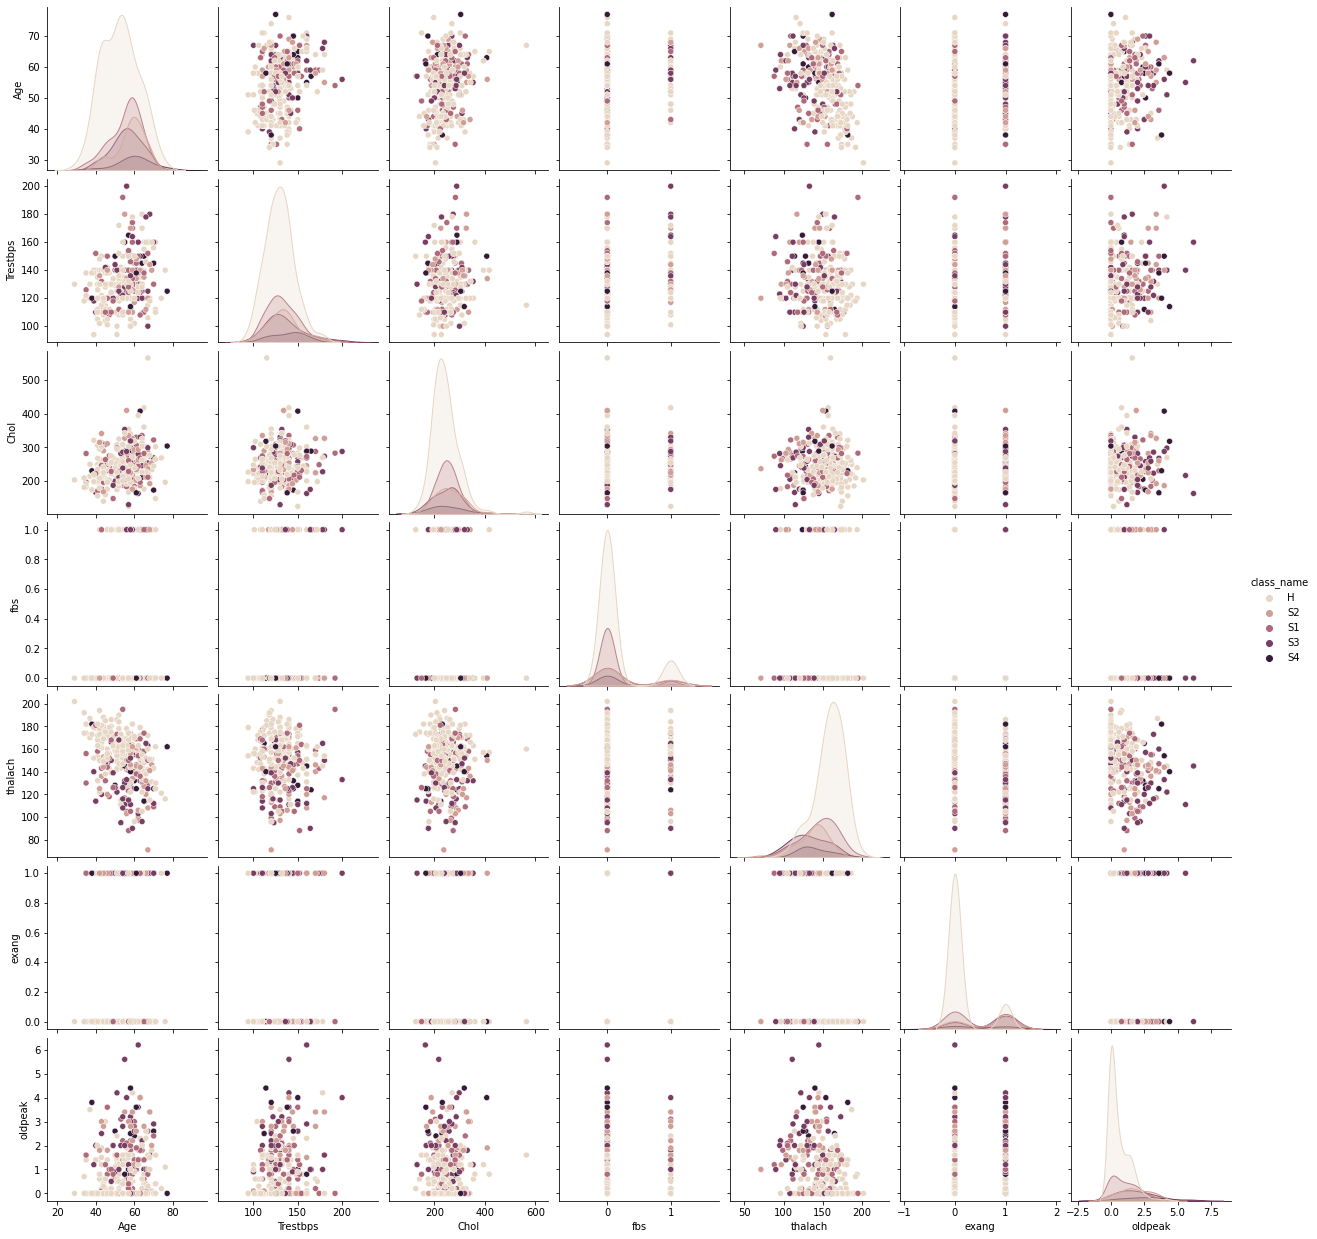

In [3]:
sns.pairplot(cleve, hue = "class_name", palette="ch:.20")

#### Understanding the relation between Cholestrol(Chol) and Resting Blood pressure(Trestbps) with respect to Chest pain type and gender for each class value(Sick or buff).

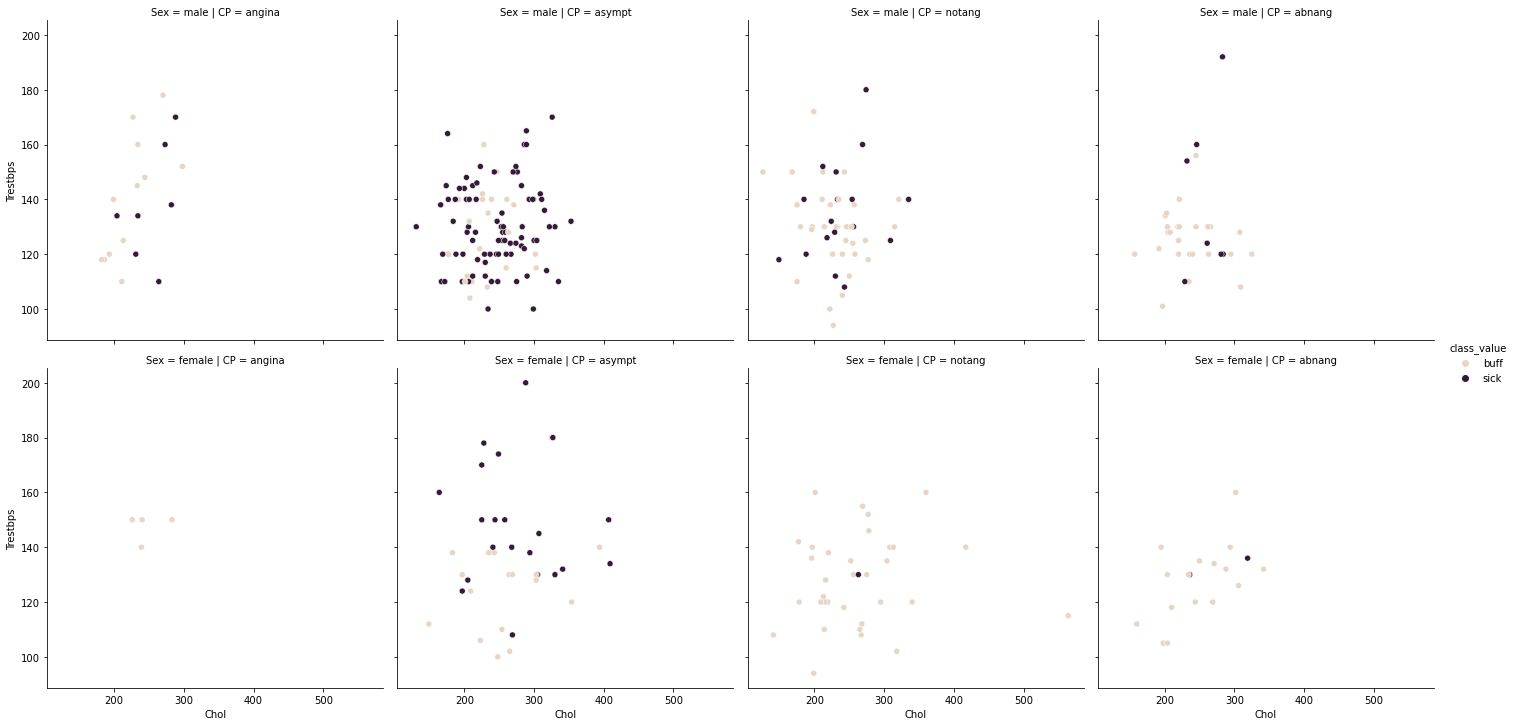

In [4]:
sns.relplot(x = "Chol", y = "Trestbps", hue = "class_value",
           row = "Sex", col = "CP", data = cleve, palette="ch:.20")

#### Understanding the relation between Resting ECGs(restecg) and resting BPS(Trestbps) with slope and gender for each class value

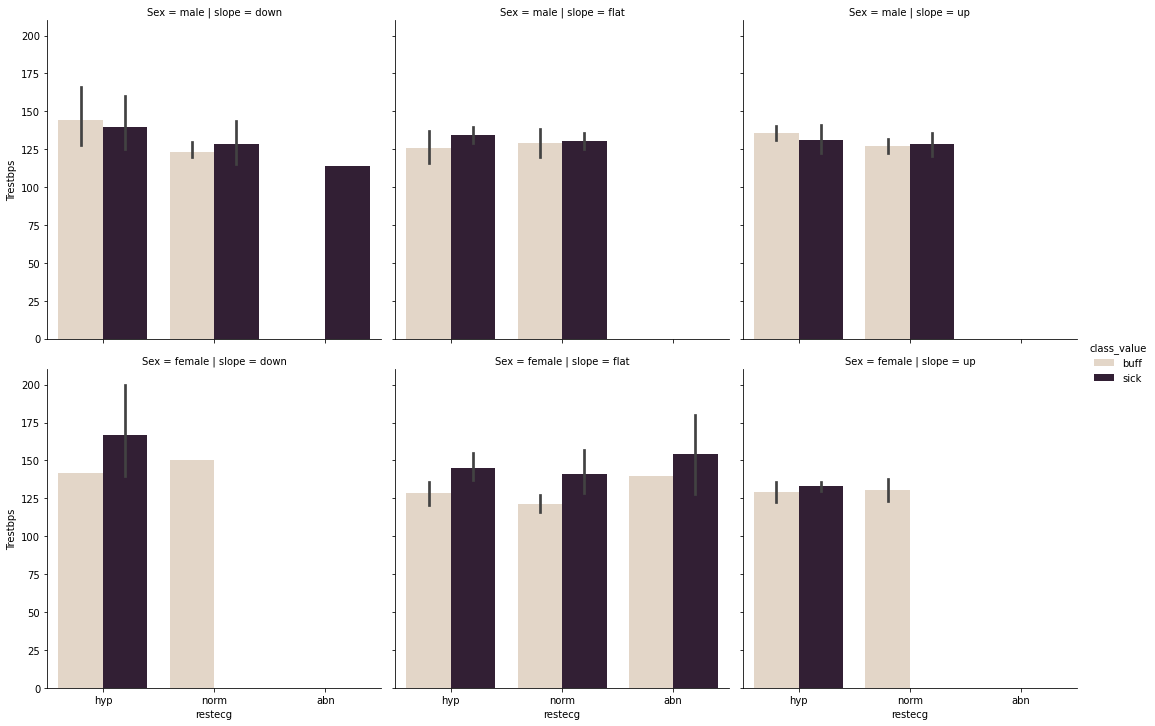

In [5]:
sns.catplot(x = "restecg", y = "Trestbps", hue = "class_value",
           row = "Sex", col = "slope", kind = "bar", palette="ch:.20", data = cleve)

#### Understanding the relation between maximum heart rate(thalach, thal) and fasting BPs(fbs) with respect to gender and class value

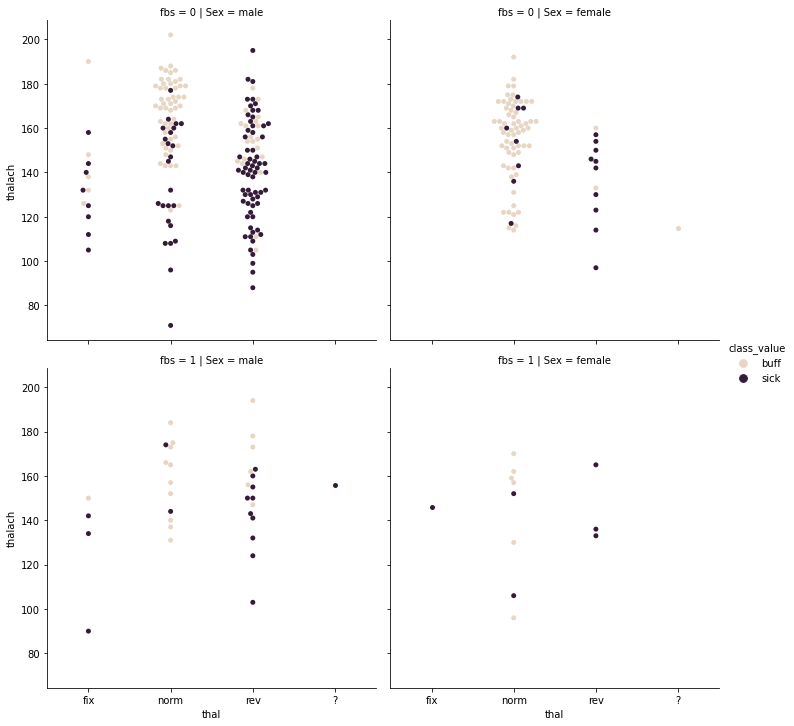

In [6]:
sns.catplot(x = "thal", y = "thalach", hue = "class_value",
            row = "fbs", col = "Sex",  kind = "swarm", data = cleve, palette="ch:.20")

#### Understanding the relation between slope of the peak exercise ST segment(slope), ST depression induced by exercise relative to rest(oldpeak) and exercise induced angina(exang) for each class value and gender

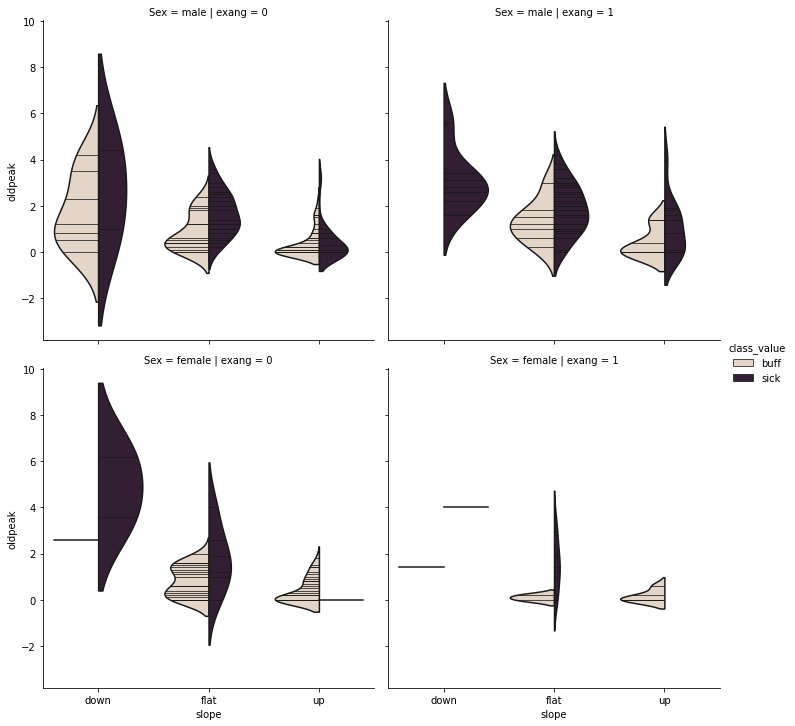

In [7]:
sns.catplot(x = "slope", y = "oldpeak", hue = "class_value",
           kind = "violin", inner = "stick", split = True,
           row = "Sex", col = "exang", palette="ch:.20", data = cleve)

<a id="clean"></a>
### Cleaning Data

In [8]:
cleve_missing = cleve.loc[cleve.isin(["?"]).any(axis=1)]
cleve_missing

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,class_attribute,thal,class_value,class_name
82,53,female,notang,128,216,0,hyp,115,0,0.0,up,0,?,buff,H
143,52,male,notang,138,223,0,norm,169,0,0.0,up,?,norm,buff,H
157,38,male,notang,138,175,0,norm,173,0,0.0,up,?,norm,buff,H
165,43,male,asympt,132,247,1,hyp,143,1,0.1,flat,?,rev,sick,S1
198,52,male,asympt,128,204,1,norm,156,1,1.0,flat,0,?,sick,S2
250,58,male,abnang,125,220,0,norm,144,0,0.4,flat,?,rev,buff,H
262,38,male,notang,138,175,0,norm,173,0,0.0,up,?,norm,buff,H


#### Drop the Outlier data

In [9]:
cleve = cleve.drop(index = cleve_missing.index,axis=1)

#### Check for the outlier data 

In [10]:
 cleve.loc[cleve.isin(["?"]).any(axis=1)]

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,class_attribute,thal,class_value,class_name


In [11]:
cleve = cleve.reset_index()


In [12]:
cleve = cleve.rename(columns = {"index":"dummy"})
cleve = cleve.drop("dummy",axis=1)

In [13]:
cleve

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,class_attribute,thal,class_value,class_name
0,63,male,angina,145,233,1,hyp,150,0,2.3,down,0,fix,buff,H
1,67,male,asympt,160,286,0,hyp,108,1,1.5,flat,3,norm,sick,S2
2,67,male,asympt,120,229,0,hyp,129,1,2.6,flat,2,rev,sick,S1
3,37,male,notang,130,250,0,norm,187,0,3.5,down,0,norm,buff,H
4,41,female,abnang,130,204,0,hyp,172,0,1.4,up,0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,48,male,notang,124,255,1,norm,175,0,0.0,up,2,norm,buff,H
292,57,male,asympt,132,207,0,norm,168,1,0.0,up,0,rev,buff,H
293,49,male,notang,118,149,0,hyp,126,0,0.8,up,3,norm,sick,S1
294,74,female,abnang,120,269,0,hyp,121,1,0.2,up,1,norm,buff,H


##### Null or missing data verification

In [14]:
cleve.isnull().sum()

Age                0
Sex                0
CP                 0
Trestbps           0
Chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
class_attribute    0
thal               0
class_value        0
class_name         0
dtype: int64

<a id="class"></a>
### Class distribution 

In [15]:
cleve["class_name"].value_counts()

H     160
S1     53
S2     35
S3     35
S4     13
Name: class_name, dtype: int64

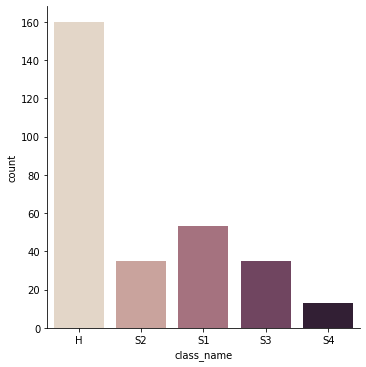

In [16]:
count_class = sns.catplot(x="class_name", kind="count", palette="ch:.20", data = cleve)

<a id="update"></a>
### Updating clean data

In [17]:
writer = ExcelWriter('cleve_mod.xlsx')
cleve.to_excel(writer,'cleve',index=False)
writer.save()

<a id="num"></a>
### Numeric data scaling
Scaling numeric data can help avoid the outliers

    X : Scaled value
    Y : Actual value
    U : Mean
    S : Standard deviation 

    X = (Y-U)/S

###### Data types of columns

In [18]:
cleve.dtypes

Age                  int64
Sex                 object
CP                  object
Trestbps             int64
Chol                 int64
fbs                  int64
restecg             object
thalach              int64
exang                int64
oldpeak            float64
slope               object
class_attribute     object
thal                object
class_value         object
class_name          object
dtype: object

###### Fetching numerical and categorical column values

In [19]:
col = np.array(cleve.columns)
cat_col = []
num_col = []
for c in col:
    cname = cleve[c]
    if(cname.dtype == 'int64' or cname.dtype == 'float64'):
        num_col.append(c)
    elif(c != "class_name"):
        cat_col.append(c)
print("Numerical data colums name: ")
print(num_col)
print("Categorical data columns name without target: ")
print(cat_col)

Numerical data colums name: 
['Age', 'Trestbps', 'Chol', 'fbs', 'thalach', 'exang', 'oldpeak']
Categorical data columns name without target: 
['Sex', 'CP', 'restecg', 'slope', 'class_attribute', 'thal', 'class_value']


In [20]:
cleve_pre = cleve.copy()
scaler = StandardScaler()
cleve_pre[num_col]=scaler.fit_transform(cleve_pre[num_col])
cleve_pre

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,class_attribute,thal,class_value,class_name
0,0.937219,male,angina,0.756938,-0.272801,2.425638,hyp,0.019152,-0.698167,1.065587,down,0,fix,buff,H
1,1.379493,male,asympt,1.604556,0.748607,-0.412263,hyp,-1.812353,1.432322,0.378598,flat,3,norm,sick,S2
2,1.379493,male,asympt,-0.655759,-0.349888,-0.412263,hyp,-0.896601,1.432322,1.323208,flat,2,rev,sick,S1
3,-1.937566,male,notang,-0.090680,0.054821,-0.412263,norm,1.632621,-0.698167,2.096070,down,0,norm,buff,H
4,-1.495292,female,abnang,-0.090680,-0.831685,-0.412263,hyp,0.978512,-0.698167,0.292725,up,0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.721311,male,notang,-0.429727,0.151180,2.425638,norm,1.109334,-0.698167,-0.909506,up,2,norm,buff,H
292,0.273807,male,asympt,0.022336,-0.773869,-0.412263,norm,0.804083,1.432322,-0.909506,up,0,rev,buff,H
293,-0.610742,male,notang,-0.768774,-1.891637,-0.412263,hyp,-1.027423,-0.698167,-0.222517,up,3,norm,sick,S1
294,2.153474,female,abnang,-0.655759,0.420986,-0.412263,hyp,-1.245459,1.432322,-0.737759,up,1,norm,buff,H


##### Visualizing numerical data after processing

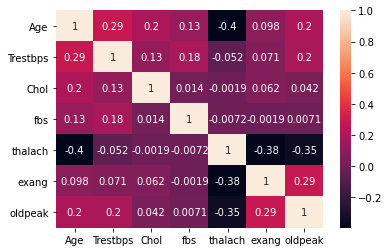

In [21]:
num = sns.heatmap(cleve_pre[num_col].corr(),annot=True)

<a id="encode"></a>
### Encoding Categorical Data
Encoding of categorical data is done as
For column "Sex" contains "male" and "female"
forms two columns as Sex_female and Sex_male
and the values are binary 0 for False and 1 for True

In [22]:
encoder = OneHotEncoder(sparse=False)
cleve_encode = pd.DataFrame(encoder.fit_transform(cleve[cat_col]))
cleve_encode.columns = encoder.get_feature_names(cat_col)
cleve_encode

,Sex_female,Sex_male,CP_abnang,CP_angina,CP_asympt,CP_notang,restecg_abn,restecg_hyp,restecg_norm,slope_down,...,slope_up,class_attribute_0,class_attribute_1,class_attribute_2,class_attribute_3,thal_fix,thal_norm,thal_rev,class_value_buff,class_value_sick
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
292,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
293,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
294,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Arranging the processed columns together

In [23]:
cleve_pre = cleve_pre.drop(cat_col,axis = 1)
cleve_pre = pd.concat([cleve_pre,cleve_encode], axis=1)
cleve_pre

,Age,Trestbps,Chol,fbs,thalach,exang,oldpeak,class_name,Sex_female,Sex_male,...,slope_up,class_attribute_0,class_attribute_1,class_attribute_2,class_attribute_3,thal_fix,thal_norm,thal_rev,class_value_buff,class_value_sick
0,0.937219,0.756938,-0.272801,2.425638,0.019152,-0.698167,1.065587,H,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.379493,1.604556,0.748607,-0.412263,-1.812353,1.432322,0.378598,S2,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.379493,-0.655759,-0.349888,-0.412263,-0.896601,1.432322,1.323208,S1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.937566,-0.090680,0.054821,-0.412263,1.632621,-0.698167,2.096070,H,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.495292,-0.090680,-0.831685,-0.412263,0.978512,-0.698167,0.292725,H,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.721311,-0.429727,0.151180,2.425638,1.109334,-0.698167,-0.909506,H,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
292,0.273807,0.022336,-0.773869,-0.412263,0.804083,1.432322,-0.909506,H,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
293,-0.610742,-0.768774,-1.891637,-0.412263,-1.027423,-0.698167,-0.222517,S1,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
294,2.153474,-0.655759,0.420986,-0.412263,-1.245459,1.432322,-0.737759,H,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


##### Encoding target labels data

In [24]:
cleve_pre["class_name"].unique()

array(['H', 'S2', 'S1', 'S3', 'S4'], dtype=object)

Here, Target label has 5 types of values. Hence each value is given a numeric value
'H'=0, 'S2'=2, 'S1'=1, 'S3'=3, 'S4'=4

In [25]:
cleve_pre["class_name"] = cleve_pre["class_name"].replace({"H":0,"S1":1,"S2":2,"S3":3,"S4":4})
cleve_pre["class_name"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [26]:
from pandas import ExcelWriter
from pandas import ExcelFile

writer = ExcelWriter('cleve_encoded.xlsx')
cleve_pre.to_excel(writer,'cleve',index=False)
writer.save()

<a id="statistics"></a>
### Statistics of cleve data

In [27]:
cleve_pre.describe()

,Age,Trestbps,Chol,fbs,thalach,exang,oldpeak,class_name,Sex_female,Sex_male,...,slope_up,class_attribute_0,class_attribute_1,class_attribute_2,class_attribute_3,thal_fix,thal_norm,thal_rev,class_value_buff,class_value_sick
count,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,3.575640e-16,-6.406287e-16,-2.633029e-16,5.663638e-17,1.729097e-16,2.280458e-16,2.362975e-17,0.945946,0.320946,0.679054,...,0.466216,0.584459,0.219595,0.128378,0.067568,0.060811,0.550676,0.388514,0.540541,0.459459
std,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.236637,0.467631,0.467631,...,0.499702,0.493650,0.414673,0.335077,0.251427,0.239388,0.498268,0.488238,0.499198,0.499198
min,-2.822115e+00,-2.124963e+00,-2.334890e+00,-4.122626e-01,-3.425822e+00,-6.981670e-01,-9.095059e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.213110e-01,-6.557585e-01,-6.967818e-01,-4.122626e-01,-7.221717e-01,-6.981670e-01,-9.095059e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.632382e-01,-9.067985e-02,-8.971830e-02,-4.122626e-01,1.281700e-01,-6.981670e-01,-2.225171e-01,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,7.160814e-01,4.743988e-01,5.414350e-01,-4.122626e-01,7.168681e-01,1.432322e+00,5.074085e-01,2.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2.485180e+00,3.864871e+00,6.106183e+00,2.425638e+00,2.286730e+00,1.432322e+00,4.414657e+00,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="classification"></a>
## Step 2: Classification Model

<a id="feature"></a>
### Feature vector:
Splitting the feature vector from the excel data cleve

In [28]:
import numpy as np

feature_vector =  np.array(cleve_pre.drop("class_name",axis=1))
fcol_len = len(feature_vector)
print(fcol_len)
feature_vector

296


array([[ 0.93721873,  0.75693814, -0.27280094, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.37949333,  1.60455613,  0.74860744, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.37949333, -0.65575852, -0.34988836, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.61074237, -0.76877425, -1.89163686, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.15347388, -0.65575852,  0.42098589, ...,  0.        ,
         1.        ,  0.        ],
       [-0.05789912,  1.60455613, -0.88950034, ...,  0.        ,
         1.        ,  0.        ]])

<a id="target"></a>
### Target labels:
Splitting the target labels from the excel data cleve

In [29]:
target_labels = np.array(cleve_pre["class_name"])
target_labels

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 3, 4, 0, 0,
       0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0, 1, 4, 0, 4, 0,
       0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0,
       3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 1, 2, 3, 0, 0, 0, 2, 3, 1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0,
       3, 0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0,
       4, 3, 1, 1, 1, 2, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0, 1, 0, 0, 3, 2, 0,
       0, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3,
       2, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3,
       0, 2, 4, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 3, 0, 2, 1, 1, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 4, 2,
       0, 0, 4, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

<a id="split"></a>
### Splitting the train and test data

In [30]:
TEST_SIZE = 0.20
RANDOM_STATE = 42

cleve_pre = pd.read_excel("cleve_encoded.xlsx")
feature_len = len(cleve_pre.columns)-1
n_class = len(cleve_pre["class_name"].unique())
feature_vector =  np.array(cleve_pre.drop("class_name",axis=1))
target_labels = np.array(cleve_pre["class_name"])
train, test, train_labels, test_labels = train_test_split(feature_vector, 
                                                    target_labels, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print("Shape of train feature: ",train.shape)
print("Shape of test feature: ",test.shape)
print("Shape of train labels feature: ",train_labels.shape)
print("Shape of test labels feature: ",test_labels.shape)
    

Shape of train feature:  (236, 28)
Shape of test feature:  (60, 28)
Shape of train labels feature:  (236,)
Shape of test labels feature:  (60,)


<a id="dataset"></a>
### Create a dataset class for model

In [31]:
class heartDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
        
    def __len__ (self):
        return len(self.x)

<a id="model"></a>
### Classification Model Class
Five class classification is constructed using linear perceptron with 3 layers:
1. Input layer of size equal to number of features.
2. Hidden layer of size 50.
3. Output layer of size equal to number of classes.
4.Batch normalization and rectified linear functions are used with dropout of 0.2.

In [32]:
class FiveClassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(FiveClassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 50)
        self.layer_out = nn.Linear(50, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(50)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_out(x)
        
        return x

#### Accuracy Method

In [33]:
def accuracy_(y_pred, y_test):
    y_pred_softmax = T.softmax(y_pred, dim = 1)
    _, y_pred_tags = T.max(y_pred_softmax, dim = 1)    
    correct_pred = (y_pred_tags == y_test).float()
    return T.round((correct_pred.sum() / len(correct_pred)) * 100)

#### Creating dataset object for train and test

In [34]:
train_ds = heartDataset(T.from_numpy(train).float(),
                            T.from_numpy(train_labels).long())
test_ds = heartDataset(T.from_numpy(test).float(),
                            T.from_numpy(test_labels).long())


##### Assigning number of Epochs, batch size and learning rates for perceptrons

In [35]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.0007

#### Creating Data loader objects for train and test 

In [36]:
test_loader = DataLoader(dataset=test_ds, batch_size=1)

train_loader = DataLoader(dataset=train_ds,
                          batch_size=BATCH_SIZE)

#### Create a device object to run the model

In [37]:
device = T.device("cpu")
print(device)

cpu


#### Creating the model object for FiveClassClassifier with optimizer and loss value

In [38]:
model = FiveClassClassification(num_feature = feature_len, num_class=n_class)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(model)

FiveClassClassification(
  (layer_1): Linear(in_features=28, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


##### Creating a json object to store the epoch number, accuracy and loss to create graphs.

In [39]:
epochs = {
    "epochNo":[],
    "Accuracy":[],
    "Loss":[] 
}

<a id="train"></a>
### Training the model

In [40]:
print("Begin training .....")
for e in tqdm(range(1, EPOCHS+1)):
    
    train_el = 0
    train_ea = 0
    
    model.train()
    for train_x, train_y in train_loader:
        train_x, train_y = train_x.to(device), train_y.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(train_x)
        
        loss = criterion(y_train_pred, train_y)
        acc = accuracy_(y_train_pred, train_y)
        
        loss.backward()
        optimizer.step()
        
        train_el += loss.item()
        train_ea += acc.item()
        
        
    epochs['epochNo'].append(e)
    epochs['Loss'].append(train_el/len(train_loader))
    epochs['Accuracy'].append(train_ea/len(train_loader))
                            
    
    print(f'Epoch No {e} | Training Loss: {train_el/len(train_loader):.5f} | Training Accuracy: {train_ea/len(train_loader):.3f}|')


Begin training .....


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch No 1 | Training Loss: 1.62200 | Training Accuracy: 23.133|
Epoch No 2 | Training Loss: 1.43949 | Training Accuracy: 50.133|
Epoch No 3 | Training Loss: 1.29294 | Training Accuracy: 64.067|
Epoch No 4 | Training Loss: 1.17165 | Training Accuracy: 68.400|
Epoch No 5 | Training Loss: 1.07224 | Training Accuracy: 67.867|
Epoch No 6 | Training Loss: 0.99138 | Training Accuracy: 67.800|
Epoch No 7 | Training Loss: 0.92500 | Training Accuracy: 69.133|
Epoch No 8 | Training Loss: 0.87019 | Training Accuracy: 69.133|
Epoch No 9 | Training Loss: 0.82350 | Training Accuracy: 72.067|
Epoch No 10 | Training Loss: 0.78273 | Training Accuracy: 72.867|
Epoch No 11 | Training Loss: 0.74649 | Training Accuracy: 74.133|
Epoch No 12 | Training Loss: 0.71379 | Training Accuracy: 77.867|
Epoch No 13 | Training Loss: 0.68416 | Training Accuracy: 80.333|
Epoch No 14 | Training Loss: 0.65710 | Training Accuracy: 81.200|
Epoch No 15 | Training Loss: 0.63223 | Training Accuracy: 81.200|
Epoch No 16 | Train

Epoch No 128 | Training Loss: 0.05339 | Training Accuracy: 100.000|
Epoch No 129 | Training Loss: 0.05220 | Training Accuracy: 100.000|
Epoch No 130 | Training Loss: 0.05116 | Training Accuracy: 100.000|
Epoch No 131 | Training Loss: 0.05030 | Training Accuracy: 100.000|
Epoch No 132 | Training Loss: 0.04921 | Training Accuracy: 100.000|
Epoch No 133 | Training Loss: 0.04836 | Training Accuracy: 100.000|
Epoch No 134 | Training Loss: 0.04723 | Training Accuracy: 100.000|
Epoch No 135 | Training Loss: 0.04651 | Training Accuracy: 100.000|
Epoch No 136 | Training Loss: 0.04545 | Training Accuracy: 100.000|
Epoch No 137 | Training Loss: 0.04449 | Training Accuracy: 100.000|
Epoch No 138 | Training Loss: 0.04358 | Training Accuracy: 100.000|
Epoch No 139 | Training Loss: 0.04269 | Training Accuracy: 100.000|
Epoch No 140 | Training Loss: 0.04183 | Training Accuracy: 100.000|
Epoch No 141 | Training Loss: 0.04089 | Training Accuracy: 100.000|
Epoch No 142 | Training Loss: 0.04016 | Training

Epoch No 250 | Training Loss: 0.00717 | Training Accuracy: 100.000|
Epoch No 251 | Training Loss: 0.00707 | Training Accuracy: 100.000|
Epoch No 252 | Training Loss: 0.00699 | Training Accuracy: 100.000|
Epoch No 253 | Training Loss: 0.00689 | Training Accuracy: 100.000|
Epoch No 254 | Training Loss: 0.00682 | Training Accuracy: 100.000|
Epoch No 255 | Training Loss: 0.00671 | Training Accuracy: 100.000|
Epoch No 256 | Training Loss: 0.00663 | Training Accuracy: 100.000|
Epoch No 257 | Training Loss: 0.00657 | Training Accuracy: 100.000|
Epoch No 258 | Training Loss: 0.00647 | Training Accuracy: 100.000|
Epoch No 259 | Training Loss: 0.00639 | Training Accuracy: 100.000|
Epoch No 260 | Training Loss: 0.00633 | Training Accuracy: 100.000|
Epoch No 261 | Training Loss: 0.00624 | Training Accuracy: 100.000|
Epoch No 262 | Training Loss: 0.00616 | Training Accuracy: 100.000|
Epoch No 263 | Training Loss: 0.00609 | Training Accuracy: 100.000|
Epoch No 264 | Training Loss: 0.00602 | Training

<a id="tviz"></a>
### Training Accuracy and loss Vizualization

Text(0.5, 1.0, 'Train Loss/Epoch')

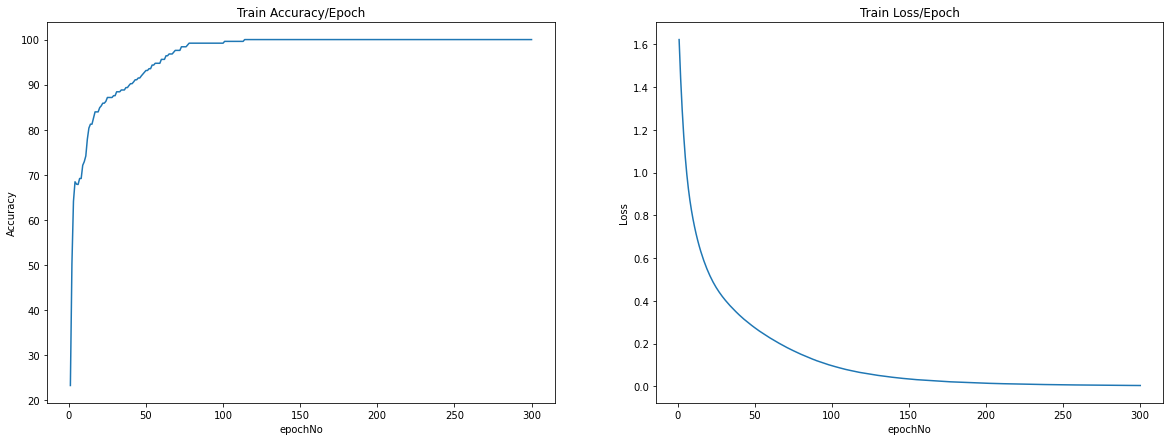

In [41]:
train_acc_loss_df = pd.DataFrame.from_dict(epochs)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_acc_loss_df, x = "epochNo", y = "Accuracy",  ax=axes[0]).set_title('Train Accuracy/Epoch')
sns.lineplot(data=train_acc_loss_df, x = "epochNo", y = "Loss", ax=axes[1]).set_title('Train Loss/Epoch')

<a id="test"></a>
### Testing the model

In [42]:
from sklearn import metrics

y_pred_list = []
with T.no_grad():
    model.eval()
    for test_x, _ in test_loader:
        test_x = test_x.to(device)
        y_test_pred = model(test_x)
        _, y_pred_tags = T.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

print("Predicted_values|   Actual_values")
print("-"*33)
for x,y in zip(y_pred_list,test_labels):
    print("\t",x,"\t|\t",y)

Predicted_values|   Actual_values
---------------------------------
	 3 	|	 3
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 2 	|	 1
	 3 	|	 4
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 1 	|	 1
	 1 	|	 2
	 2 	|	 2
	 0 	|	 0
	 1 	|	 1
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 1 	|	 4
	 1 	|	 1
	 0 	|	 0
	 2 	|	 2
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 1 	|	 1
	 0 	|	 0
	 0 	|	 0
	 2 	|	 1
	 1 	|	 3
	 0 	|	 0
	 0 	|	 0
	 1 	|	 3
	 0 	|	 0
	 2 	|	 3
	 0 	|	 0
	 1 	|	 2
	 3 	|	 2
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 1 	|	 2
	 2 	|	 2
	 0 	|	 0
	 0 	|	 0
	 3 	|	 3
	 3 	|	 3
	 1 	|	 3
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 0 	|	 0
	 3 	|	 3
	 0 	|	 0
	 0 	|	 0
	 1 	|	 1
	 2 	|	 1


<a id="evaluate"></a>
## Step 3: Evaluating the Classification Model

<a id="acc"></a>
### Total Accuracy and Classification Error

In [43]:
Accuracy = metrics.accuracy_score(test_labels,y_pred_list)
print("Accuracy",Accuracy)
print("Classification Error",1-Accuracy)

Accuracy 0.7833333333333333
Classification Error 0.21666666666666667


<a id="report"></a>
### Calculate Precision, Recall, f1-score, support for each class

In [44]:
print(classification_report(test_labels, y_pred_list))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.42      0.62      0.50         8
           2       0.43      0.43      0.43         7
           3       0.67      0.50      0.57         8
           4       0.00      0.00      0.00         2

    accuracy                           0.78        60
   macro avg       0.50      0.51      0.50        60
weighted avg       0.78      0.78      0.78        60



<a id="cm"></a>
### Confusion Matrix

In [45]:
print(metrics.confusion_matrix(test_labels, y_pred_list))

[[35  0  0  0  0]
 [ 0  5  3  0  0]
 [ 0  3  3  1  0]
 [ 0  3  1  4  0]
 [ 0  1  0  1  0]]


<AxesSubplot:>

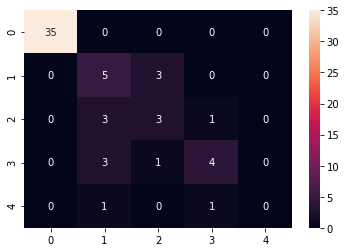

In [46]:
cm_df = pd.DataFrame(confusion_matrix(test_labels, y_pred_list))
sns.heatmap(cm_df, annot = True)

#### Binarizing the values

In [47]:
classes = np.array(cleve_pre["class_name"].unique())

test_bin = label_binarize(y_pred_list, classes = classes)
target_bin = label_binarize(test_labels, classes = classes)
n_classes = target_bin.shape[1]

print("NORMAL VALUES   |\tBINARIZE VALUES")
print("-"*40)
for i in range(0,10):
    print(test_labels[i],"\t\t|\t",target_bin[i])
    

NORMAL VALUES   |	BINARIZE VALUES
----------------------------------------
3 		|	 [0 0 0 1 0]
0 		|	 [1 0 0 0 0]
0 		|	 [1 0 0 0 0]
0 		|	 [1 0 0 0 0]
0 		|	 [1 0 0 0 0]
1 		|	 [0 0 1 0 0]
4 		|	 [0 0 0 0 1]
0 		|	 [1 0 0 0 0]
0 		|	 [1 0 0 0 0]
0 		|	 [1 0 0 0 0]


<a id="roc5"></a>
### ROC Curve and AUC values for each class
declaring false positive rates (fpr), true positive rates (tpr)

In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()

##### Calculate the fpr, tpr, auc values and all false positive values

In [49]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(target_bin[:,i],test_bin[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


##### Calculate mean of true positive values

In [50]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

#### Plot the ROC Curve for 5 classes

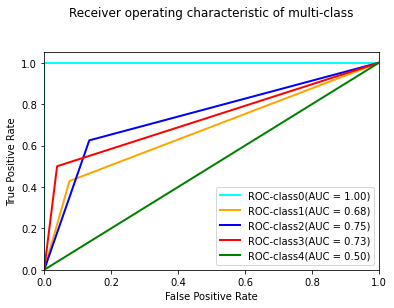

In [51]:
plt.figure()
colors = cycle(['aqua', 'orange', 'blue','red','green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC-class{0}(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multi-class\n\n')
plt.legend(loc="lower right")
plt.show()   

<a id="roc"></a>
### ROC Curve for cross-validation (k-Folds = 10)

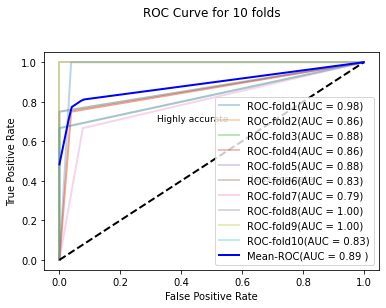

In [52]:
cv_folds = StratifiedKFold(n_splits = 10)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

x =  cleve_pre.drop("class_name",axis=1)
y = cleve_pre["class_name"]
for train, test in cv_folds.split(x, y):
    xd = T.from_numpy(np.array(x.iloc[train])).float()
    yd = T.from_numpy(np.array(x.iloc[test])).float()
    yl = np.array(y.iloc[test])
    pred_xl = model(xd)
    pred_yl = model(yd)
    _, yl_pred_tags = T.max(pred_yl, dim = 1)
    test_bin = label_binarize(yl_pred_tags.detach().numpy(), classes = classes)
    target_bin = label_binarize(yl, classes = classes)
    
    fpr, tpr, t = roc_curve(target_bin[:, 1],test_bin[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC-fold%d(AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean-ROC(AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 10 folds\n\n')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'Highly accurate',fontsize = 9)
plt.text(0.63,0.4,'Less accurate',fontsize = 9)
plt.show()